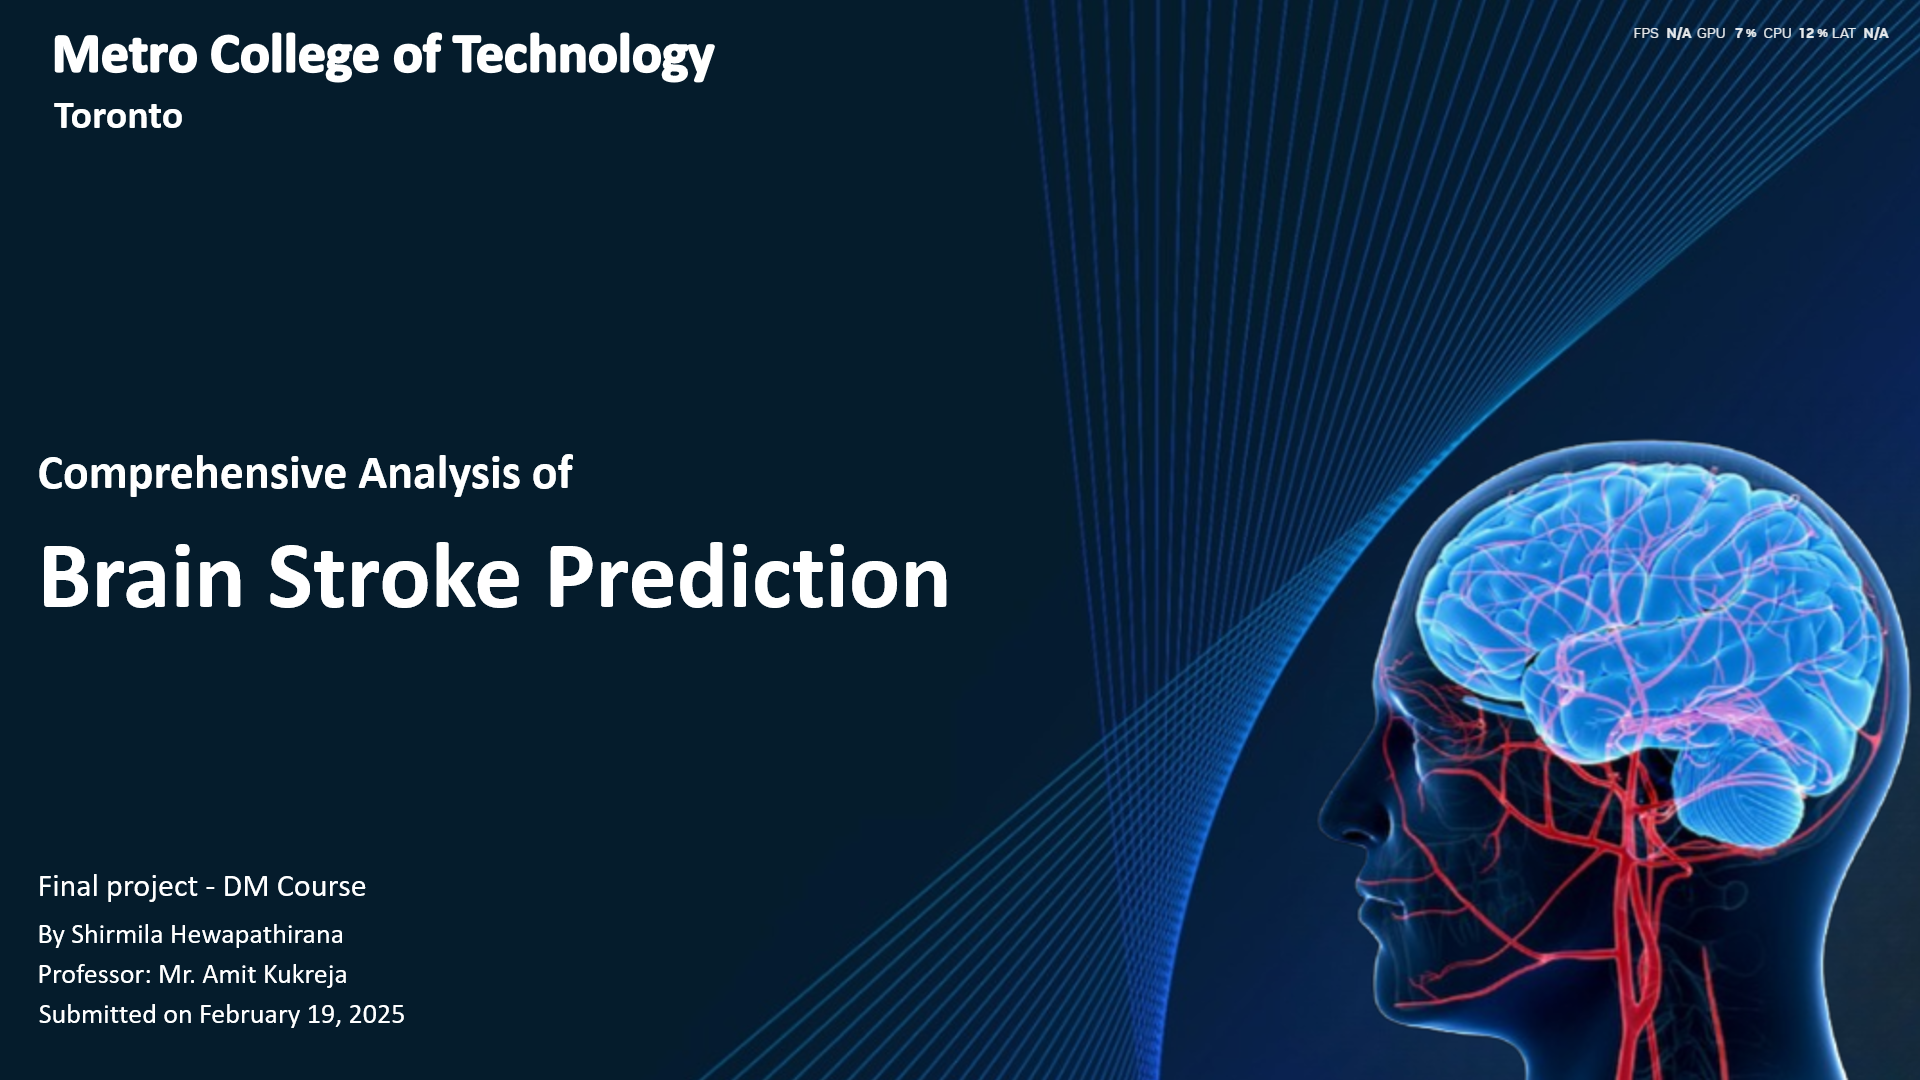

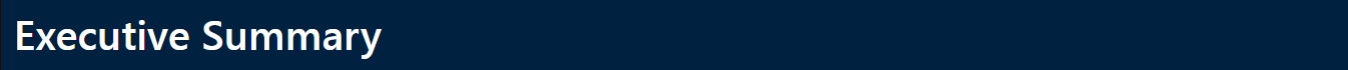

## What is a stroke?

A stroke is a medical condition in which poor blood flow to the brain causes cell death. The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. This dataset containing data about the poaple if there have stroke or not and some information about their health and social status.

### Exploratory Data Analysis

For this project, I utilized the Brain Stroke Prediction dataset sourced from Kaggle (available under the same name in their datasets section). 

This dataset encompasses a range of relevant features including gender, age, hypertension status, heart disease history, marital status, work type, residence type, average glucose level, BMI, and smoking status.  Prior to model development, 

I conducted essential data preprocessing. This involved addressing missing values, transforming categorical variables into a suitable numerical format, and standardizing numerical features. These steps were crucial to ensure the dataset was well-prepared for robust predictive modeling.  

Further details on these data preparation procedures can be found within the comments in the code. With the data prepped, we can now proceed to the model building phase.

#### Understanding the Variables

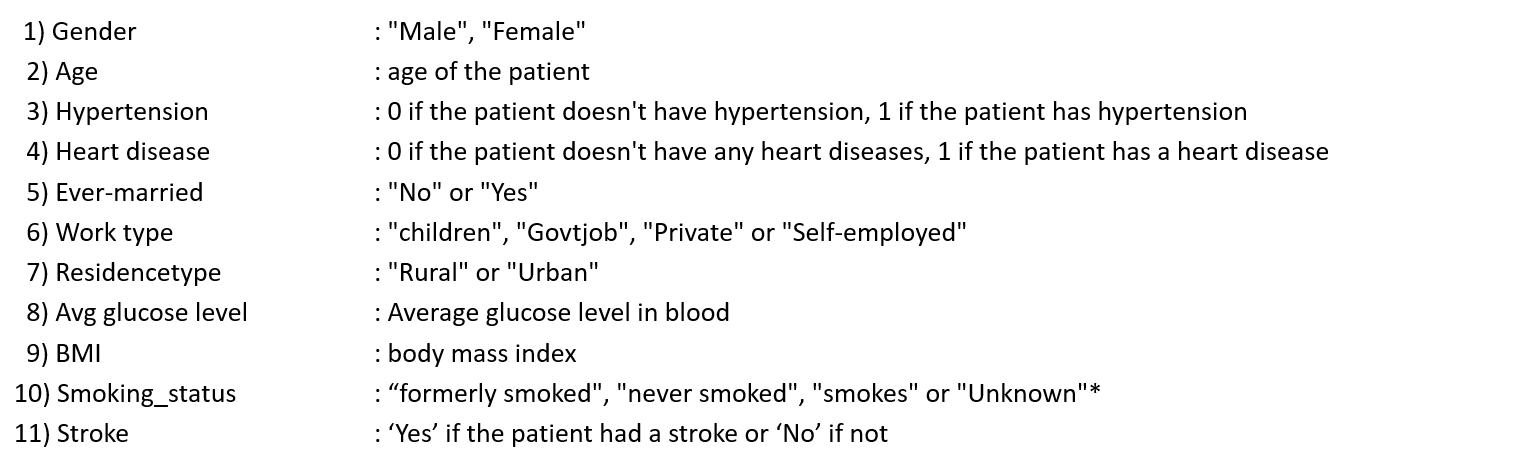

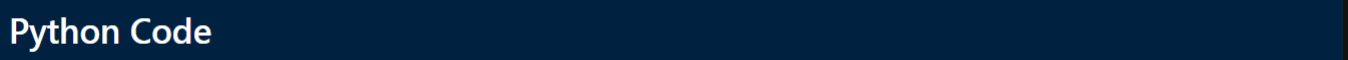

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, mannwhitneyu, f_oneway, shapiro, levene, bartlett, kruskal
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

#### 1.	Import the dataset: Load the data into your analysis environment.

In [2]:
# import dataset
df = pd.read_csv('brain_stroke.csv') 

In [3]:
df.shape

(4981, 11)

#### 2.	Display records: Show the first 5 and last 5 records of the dataset.

In [4]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,81.00,No,No,Yes,Self-employed,Rural,81.95,16.9,never smoked,Yes
1,Female,1.32,No,No,No,children,Urban,70.37,18.7,Unknown,Yes
2,Female,81.00,No,Yes,Yes,Self-employed,Rural,78.70,19.4,Unknown,Yes
3,Female,78.00,No,No,Yes,Private,Rural,78.81,19.6,Unknown,Yes
4,Female,78.00,Yes,No,No,Private,Urban,130.54,20.1,never smoked,Yes


In [5]:
df.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Female,65.0,No,No,Yes,Private,Rural,220.47,48.7,never smoked,No
4977,Female,53.0,No,No,Yes,Govt_job,Rural,81.36,48.8,never smoked,No
4978,Male,14.0,No,No,No,Private,Urban,79.36,48.8,never smoked,No
4979,Female,37.0,No,No,Yes,Private,Rural,94.77,48.9,Unknown,No
4980,Female,50.0,No,No,Yes,Govt_job,Urban,89.95,48.9,formerly smoked,No


In [87]:
df.describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


In [91]:
df.describe(include='object')

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,4981,4981,4981,4981,4981,4981,4981,4981
unique,2,2,2,2,4,2,4,2
top,Female,No,No,Yes,Private,Urban,never smoked,No
freq,2907,4502,4706,3280,2860,2532,1838,4733


#### 3.	Identify data types: Check and note the data types for each variable.

In [6]:
df.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

#### 4.	Missing entries: Determine the number of missing entries per variable.

In [7]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### 5.	Duplicate records: Identify and count any duplicate records.

In [8]:
dup = df.duplicated().sum()

In [9]:
# I do not have duplicates in my data set. 
# But if I had, I could remove duplicate records with below code.
df = df.drop_duplicates()

#### 6.	Univariate analysis: Conduct this analysis on all variables, creating appropriate visualizations.

In [10]:
data_types = df.dtypes
num_features = data_types[data_types!='object'].index 
cat_features = data_types[data_types=='object'].index

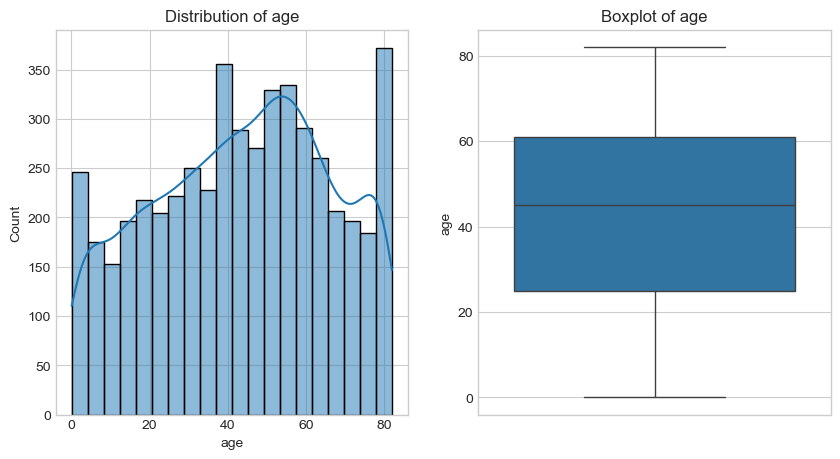

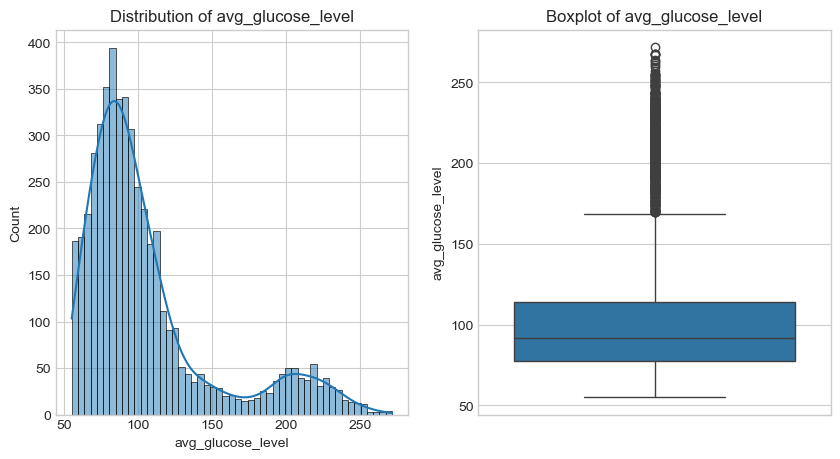

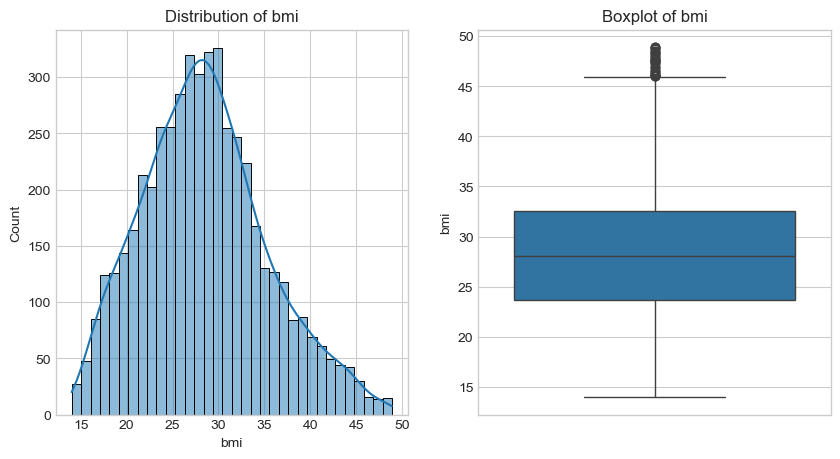

In [11]:
# Numeric variables
for feature in num_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [12]:
# bmi
pd.concat([df['bmi'].value_counts().sort_values(ascending=False), df['bmi'].value_counts(normalize=True).round(3)*100], axis = 1).T

bmi,28.7,28.4,27.3,27.6,27.7,26.7,30.0,26.1,27.0,26.4,...,47.4,44.4,44.1,47.9,48.1,48.2,48.4,14.0,48.7,46.3
count,42.0,41.0,38.0,37.0,37.0,37.0,37.0,37.0,36.0,36.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
proportion,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.7,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Visualization - Histogram

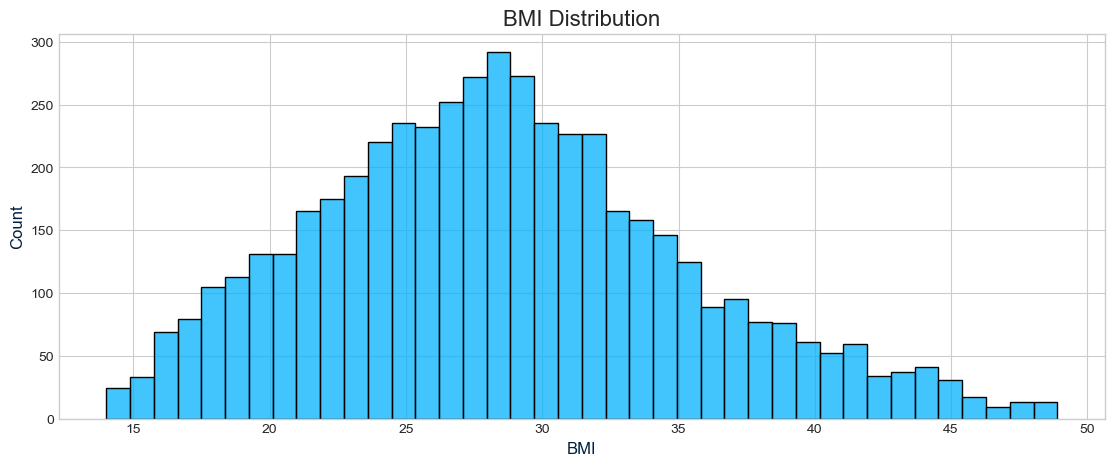

In [13]:
fig, ax = plt.subplots(figsize = (13.5,5))
sns.histplot(df.bmi, bins = 40, color='#03b1fc')

plt.title('BMI Distribution', fontsize = 16) #, color = '#012141'
plt.xlabel('BMI', fontsize = 12, color = '#012141') 
plt.ylabel('Count', fontsize = 12, color = '#012141') 
plt.xticks(fontsize = 10, )
plt.yticks(fontsize = 10)
plt.show()

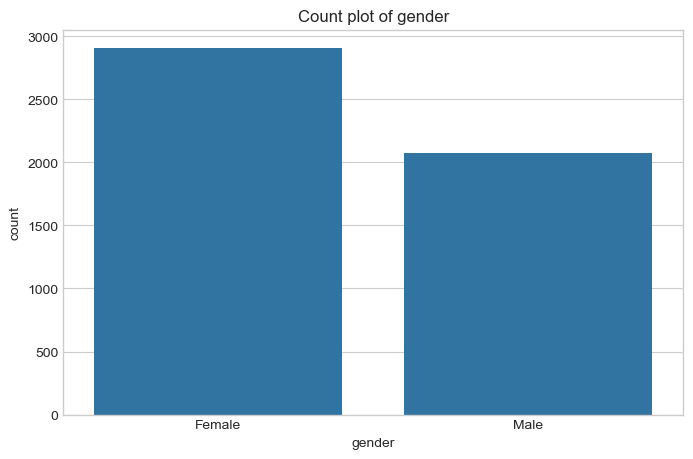

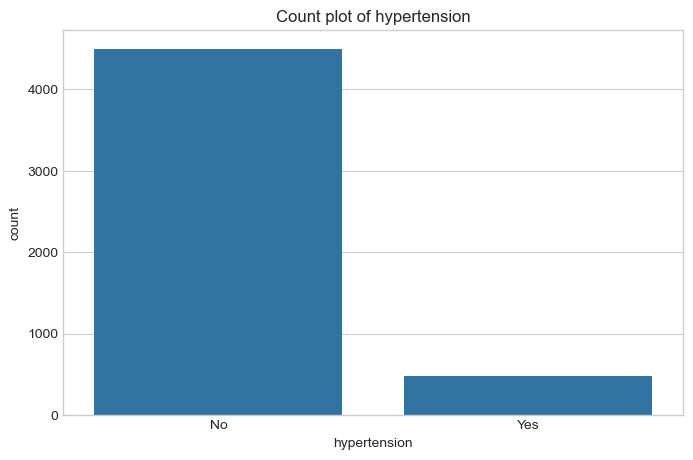

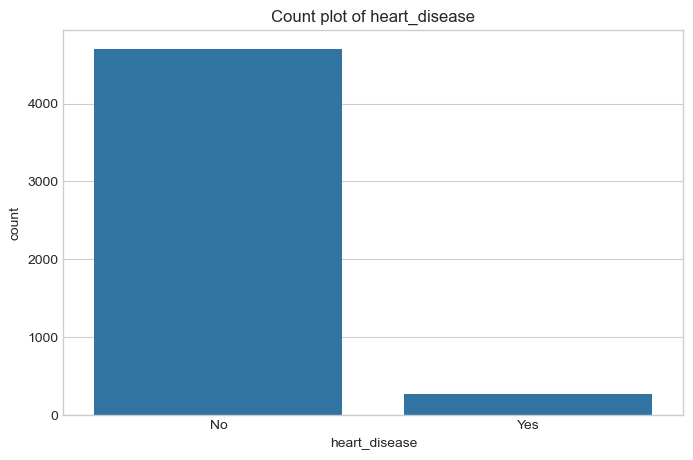

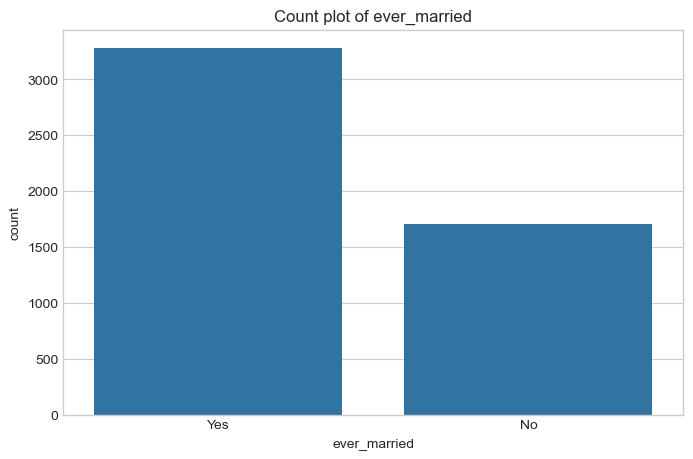

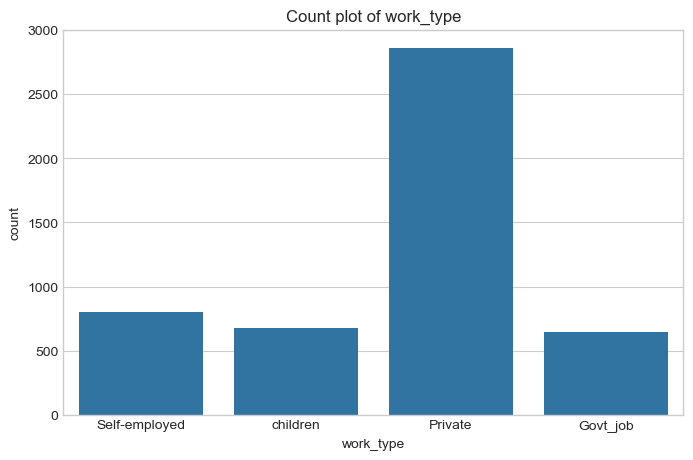

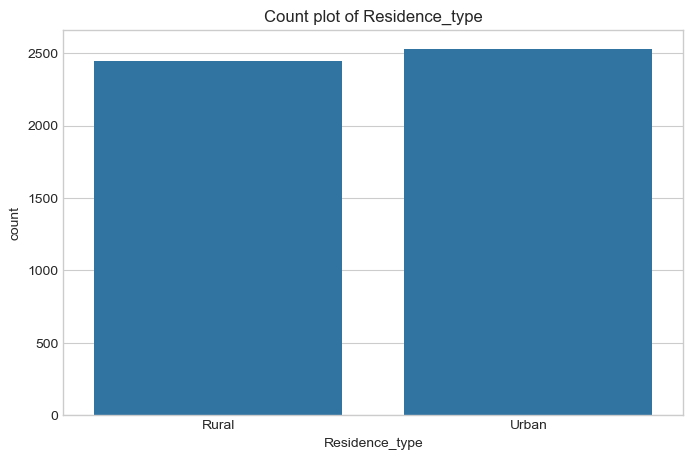

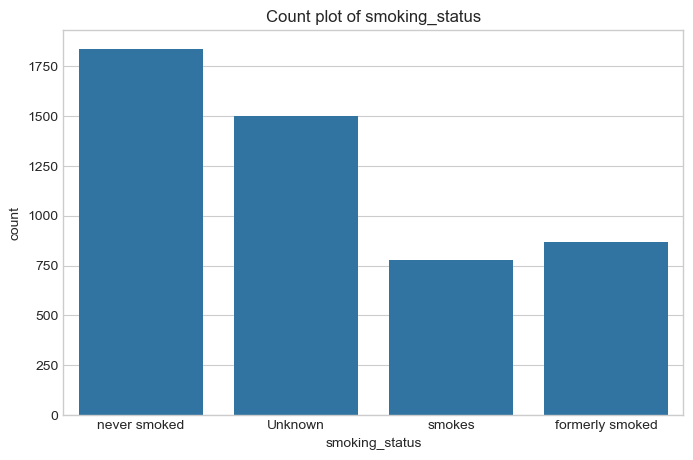

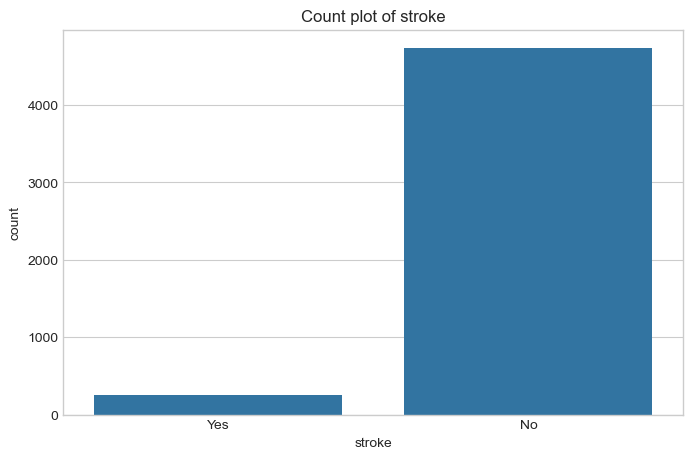

In [14]:
# Categorical variables
for feature in cat_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[feature])
    plt.title(f'Count plot of {feature}')
    plt.show()

In [15]:
# work_type
work_type_ = pd.concat([df['work_type'].value_counts(), df['work_type'].value_counts(normalize=True).round(3)*100], axis = 1).T
work_type_

work_type,Private,Self-employed,children,Govt_job
count,2860.0,804.0,673.0,644.0
proportion,57.4,16.1,13.5,12.9


#### Visualization_1 - Pie Chart

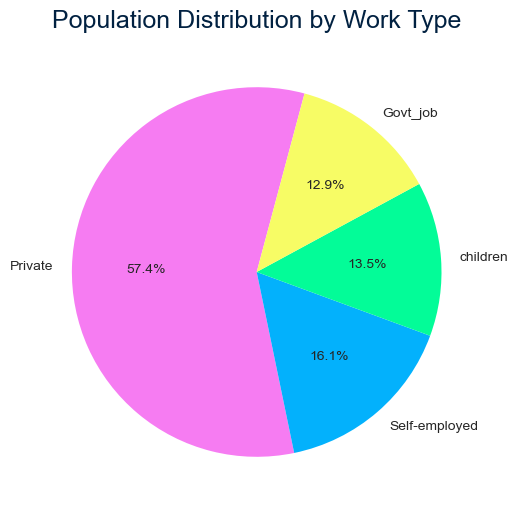

In [16]:
# work_type
plt.figure(figsize=(7, 6))
df.work_type.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', startangle=75, colors=['#F67CF2', '#03B1FC', '#03fc98', '#f7fc65']) #,labels=['', '', '', '']
plt.title("Population Distribution by Work Type", fontsize = 18, color = '#012141', pad = 10)
plt.ylabel('')
plt.show()

#### Visualization_2 - Bar Chart

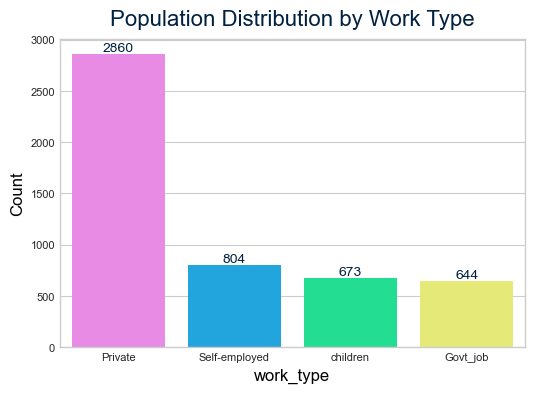

In [17]:
# work_type
s = df['work_type'].value_counts()

fig, ax = plt.subplots(1,1, figsize = (6,4))

bar_colors = ['#F67CF2', '#03B1FC', '#03fc98', '#f7fc65']
barplot_df = pd.DataFrame({'cat': s.index, 'val': s.values})
barplot = sns.barplot(x='cat', y='val', hue = s.index, data=barplot_df, palette=bar_colors)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', fontsize=10, color='#012141')

plt.title('Population Distribution by Work Type', fontsize = 16, color = '#012141', pad = 10)
plt.ylabel('Count', fontsize = 12, color = 'black') #
plt.xlabel('work_type', fontsize = 12, color = 'black') 
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

#### 7.	Outlier detection: Use the Tukey method to identify outliers

<Axes: ylabel='bmi'>

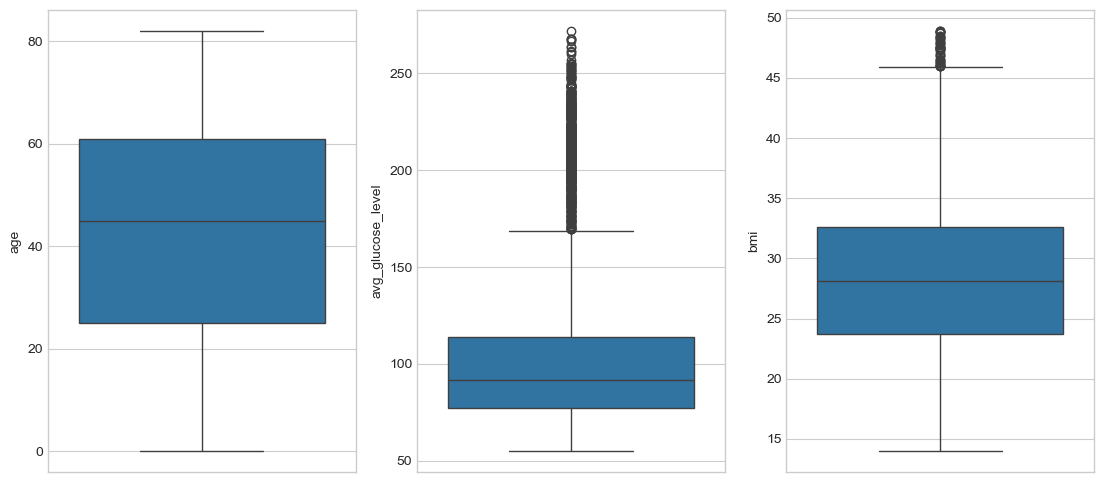

In [18]:
# Visual check
fig, ax = plt.subplots(1,3, figsize = (13.5,6))
sns.boxplot(df.age, ax=ax[0])
sns.boxplot(df.avg_glucose_level, ax=ax[1])
sns.boxplot(df.bmi, ax=ax[2])

In [19]:
num_features = df[num_features]

In [20]:
# create a df to analyze outliers in the dataframe using tukey method
num_stats = pd.DataFrame(num_features.describe().T)

num_stats['p95%'] = num_features.quantile(0.95)
num_stats['p99%'] = num_features.quantile(0.99)
num_stats['IQR'] = num_stats['75%'] - num_stats['25%']

num_stats['lower inner fence'] = num_stats['25%'] - 1.5*num_stats['IQR'] # 'Q1-1.5*IQR'
num_stats['upper inner fence'] = num_stats['75%'] + 1.5*num_stats['IQR'] # 'Q3+1.5*IQR'

num_stats['lower outer fence'] = num_stats['25%'] - 3*num_stats['IQR'] # 'Q1-3*IQR'
num_stats['upper outer fence'] = num_stats['75%'] + 3*num_stats['IQR'] # 'Q3+3*IQR'

# Calculate differences
num_stats['diff max 99'] = num_stats['max'] - num_stats['p99%']
num_stats['diff max 95'] = num_stats['max'] - num_stats['p95%']
num_stats['diff 99 Q3'] = num_stats['p99%'] - num_stats['75%']

num_stats['OL Lower'] = num_stats['max'] > (num_stats['upper inner fence'])
num_stats['OL Upper'] = num_stats['max'] > (num_stats['upper outer fence'])

# num_stats['OL'] = (num_stats['p99%']-num_stats['75%']) > (num_stats['max'] - num_stats['p99%']) 
# num_stats['OL'] = (num_stats['p99%'] - num_stats['75%']) > (num_stats['max'] - num_stats['p99%']) 
# num_stats['OL'] = (num_stats['p99%'] - num_stats['75%']) < (num_stats['max'] - num_stats['p99%'])

num_stats

,count,mean,std,min,25%,50%,75%,max,p95%,p99%,IQR,lower inner fence,upper inner fence,lower outer fence,upper outer fence,diff max 99,diff max 95,diff 99 Q3,OL Lower,OL Upper
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00,79.0,82.00,36.00,-29.000,115.000,-83.00,169.00,0.00,3.00,21.00,False,False
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74,216.0,240.82,36.63,22.285,168.805,-32.66,223.75,30.92,55.74,126.96,True,True
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90,41.1,45.50,8.90,10.350,45.950,-3.00,59.30,3.40,7.80,12.90,True,False


In [21]:
# Let's check how many 'upper inner fence' outliers of 'bmi' are lying within the 'upper outer fence' outliers of 'avg_glucose_level'
df[(df['avg_glucose_level'] > 223.75) & (df['bmi'] > 45.95)].shape[0]

4

In [22]:
a= df[df['avg_glucose_level'] > 168.805].shape[0]
b= df[df['avg_glucose_level'] > 223.75].shape[0]
c= df[df['bmi'] > 45.95].shape[0]
d= df[df['bmi'] > 59.3].shape[0]

print(
    f"Outlir details\n\n"
    f"avg_glucose_level:\n"
    f"Method: upper inner fence:{a}\n"
    f"Method: upper outer fence:{b}\n"
    f"\n"
    f"bmi:\n"
    f"Method: upper inner fence:{c}\n"
    f"Method: upper outer fence:{d}")

Outlir details

avg_glucose_level:
Method: upper inner fence:602
Method: upper outer fence:165

bmi:
Method: upper inner fence:43
Method: upper outer fence:0


#### CONCLUSION
High BMI or glucose levels may be clinically relevant for stroke prediction. Removing these could discard critical risk factors. Hence I do not drop any identified outliers.

noets:\
602 outliers in avg_glucose_level = 12% of the dataset\
165 outliers in avg_glucose_level =  3% of the dataset

#### 8.	Bivariate analysis: Perform at least one analysis for each of the following hypothesis tests:

-	Chi-square test to assess independence between two categorical variables.
-	Correlation analysis to examine relationships between two numeric variables.
-	T-test or Mann-Whitney U test to compare means between two groups.
-	Analysis of Variance (ANOVA) to compare means across multiple groups.

In [23]:
df1 = df.copy

In [24]:
# df = df[(df['avg_glucose_level'] <= 223.75)]

In [25]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,81.0,No,No,Yes,Self-employed,Rural,81.95,16.9,never smoked,Yes


In [26]:
df.groupby(['stroke','gender']).size().reset_index(name='count')


,stroke,gender,count
0,No,Female,2767
1,No,Male,1966
2,Yes,Female,140
3,Yes,Male,108


#### Chi-square test to assess independence between two categorical variables.

In [27]:
def chi_square (df=df, c1='gender', c2='stroke'):
    print(f"H0: THE VARIABLES ARE INDEPENDENT(There is no association between STROKE and GENDER);")
    print(f"H1: THE VARIABLES ARE DEPENDENT(There is an association between STROKE and GENDER);")
    print(f"\nChi-square test: {c1} and {c2}")
    print('-'*42)
    contingency_table = pd.crosstab(df[c1], df[c2], margins = False)
    print(f"contingency Table:\n",contingency_table)
    chi2, p_val, dof, exp_val = chi2_contingency(contingency_table)
    # chi2, p, dof, expected
    print(f"\nExpected frequencies:\n", pd.DataFrame(exp_val))
    
    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"P-value             : {p_val:.4f}")
    print(f"Degrees of freedom  : {dof}")
    
    if p_val > 0.05:
        print(f'\nSince p_value: {p_val:.4f} is > alpha(0.05), \nwe conclude with 95% confidence that, THE VARIABLES ARE INDEPENDENT\n')
    
    else:
        print(f'\nSince p_value: {p_val:.4f} is < alpha(0.05), \nwe conclude with 95% confidence that, THE VARIABLES ARE DEPENDENT\n')
    


#### Chi-square test: gender and stroke

In [28]:
chi_square ()

H0: THE VARIABLES ARE INDEPENDENT(There is no association between STROKE and GENDER);
H1: THE VARIABLES ARE DEPENDENT(There is an association between STROKE and GENDER);

Chi-square test: gender and stroke
------------------------------------------
contingency Table:
 stroke    No  Yes
gender           
Female  2767  140
Male    1966  108

Expected frequencies:
              0           1
0  2762.262799  144.737201
1  1970.737201  103.262799

Chi-square statistic: 0.3135
P-value             : 0.5755
Degrees of freedom  : 1

Since p_value: 0.5755 is > alpha(0.05), 
we conclude with 95% confidence that, THE VARIABLES ARE INDEPENDENT



#### Chi-square test: smoking_status and stroke

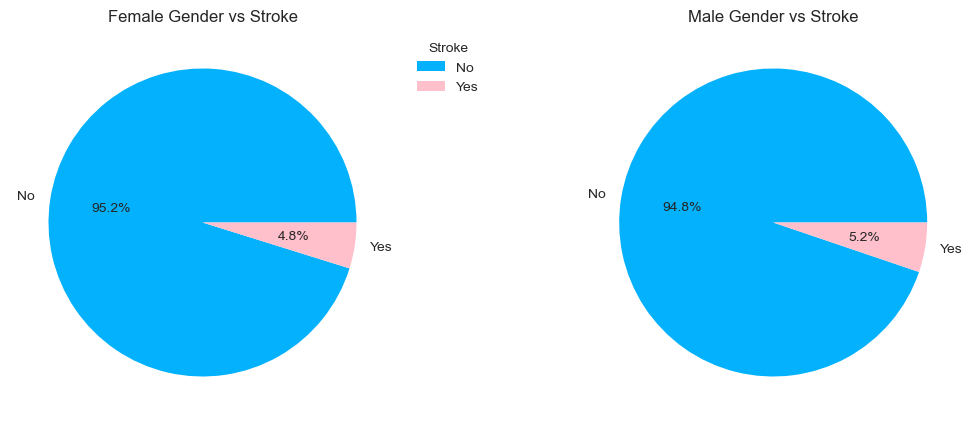

In [29]:
# plot pie chart
f_gender = df['stroke'][df.gender == 'Female'].value_counts()
m_gender = df['stroke'][df.gender == 'Male'].value_counts()

fig, ax = plt.subplots(1,2, figsize = (13.5,5))

ax[0].pie(f_gender, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink']) #lambda p: f'{int(p * sum(f_gender) / 100)}'
ax[0].set_title('Female Gender vs Stroke')
ax[0].legend(title='Stroke', loc='upper right', bbox_to_anchor=(1.25, 1)) 

ax[1].pie(m_gender, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink'])
ax[1].set_title('Male Gender vs Stroke')

plt.show()

In [30]:
chi_square (df=df, c1='smoking_status', c2='stroke')

H0: THE VARIABLES ARE INDEPENDENT(There is no association between STROKE and GENDER);
H1: THE VARIABLES ARE DEPENDENT(There is an association between STROKE and GENDER);

Chi-square test: smoking_status and stroke
------------------------------------------
contingency Table:
 stroke             No  Yes
smoking_status            
Unknown          1453   47
formerly smoked   797   70
never smoked     1749   89
smokes            734   42

Expected frequencies:
              0          1
0  1425.316202  74.683798
1   823.832765  43.167235
2  1746.487452  91.512548
3   737.363582  38.636418

Chi-square statistic: 28.7335
P-value             : 0.0000
Degrees of freedom  : 3

Since p_value: 0.0000 is < alpha(0.05), 
we conclude with 95% confidence that, THE VARIABLES ARE DEPENDENT



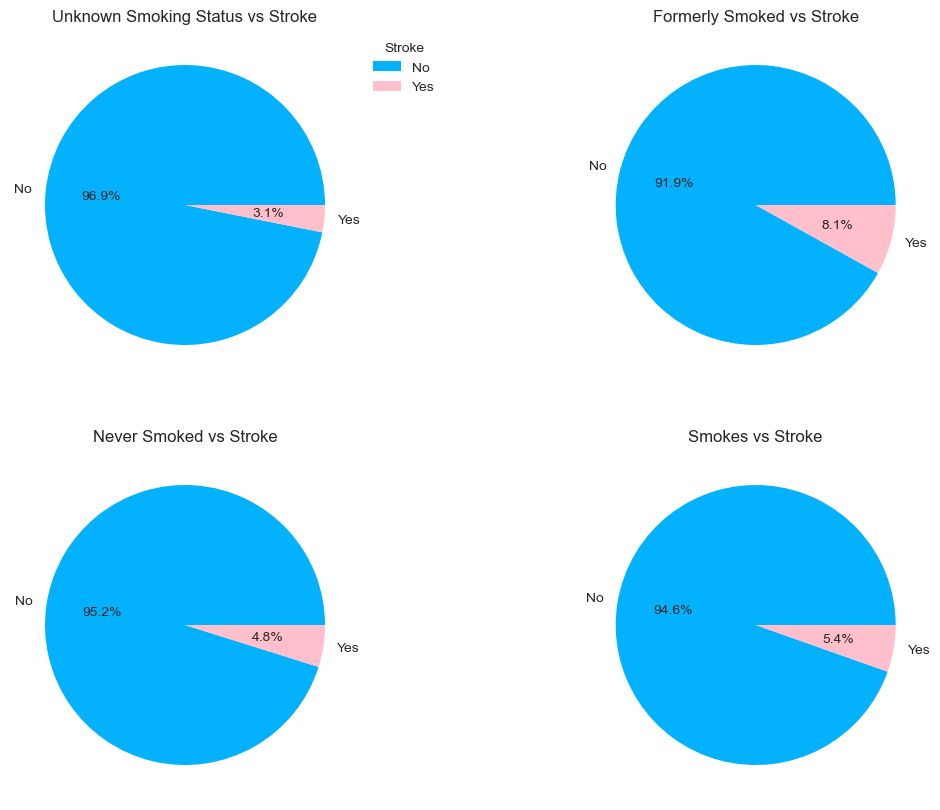

In [31]:
# plot pie chart
smoking_st = df['stroke'][df.smoking_status == 'Unknown'].value_counts()
formaly_smoked = df['stroke'][df.smoking_status == 'formerly smoked'].value_counts()
never_smoked = df['stroke'][df.smoking_status == 'never smoked'].value_counts()
smokes = df['stroke'][df.smoking_status == 'smokes'].value_counts()

fig, ax = plt.subplots(2,2, figsize = (13.5,10))

ax[0,0].pie(smoking_st, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink']) 
ax[0,0].set_title('Unknown Smoking Status vs Stroke')
ax[0,0].legend(title='Stroke', loc='upper right', bbox_to_anchor=(1.25, 1)) 

ax[0,1].pie(formaly_smoked, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink'])
ax[0,1].set_title('Formerly Smoked vs Stroke')

ax[1,0].pie(never_smoked, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink'])
ax[1,0].set_title('Never Smoked vs Stroke')

ax[1,1].pie(smokes, labels= ['No', 'Yes'], autopct='%.1f%%', colors=['#03B1FC', 'pink'])
ax[1,1].set_title('Smokes vs Stroke')

plt.show()

#### Correlation analysis to examine relationships between two numeric variables.

Correlation Matrix:
                        age  avg_glucose_level       bmi
age                1.000000           0.236763  0.373703
avg_glucose_level  0.236763           1.000000  0.186348
bmi                0.373703           0.186348  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

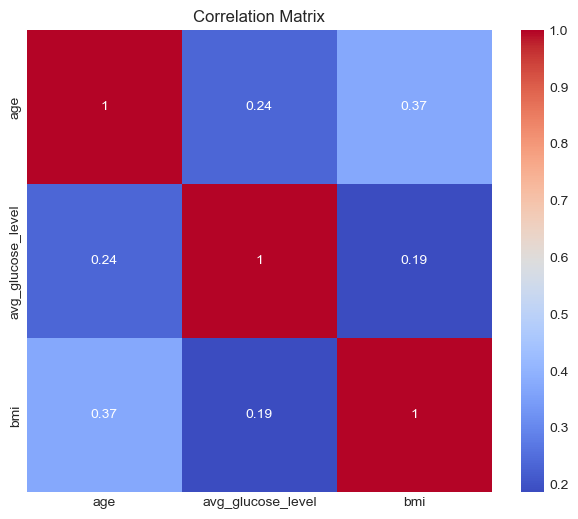

In [32]:
# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(7.5, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

### OBSERVATIONS:
- Age has some correlations to bmi, avg_gluclose_level
- All categories have a positive correlation to each other (no negatives)

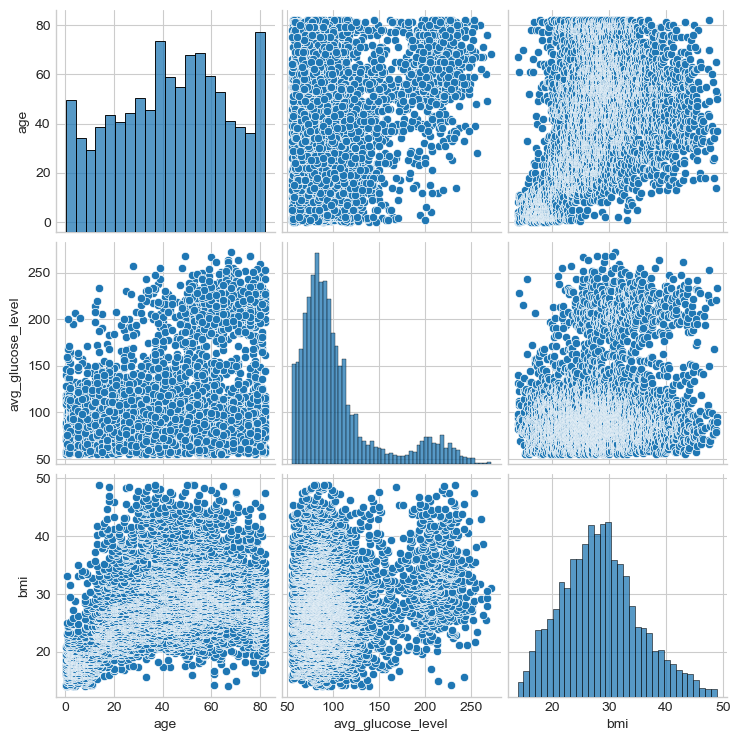

In [33]:
sns.pairplot(df)

In [34]:
# Correlation analysis: age and avg_glucose_level
print(f"\nCorrelation analysis: \nage and avg_glucose_level\n")
correlation, p_value = pearsonr(df['age'], df['avg_glucose_level'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value                        : {p_value:.4f}")

if p_value < 0.05:
    print(f"\nReject the null hypothesis. There is a significant linear relationship between the variables.")
else:
    print(f"\nFail to reject the null hypothesis. There is no significant linear relationship between the variables.")


Correlation analysis: 
age and avg_glucose_level

Pearson correlation coefficient: 0.2368
P-value                        : 0.0000

Reject the null hypothesis. There is a significant linear relationship between the variables.


Pearson Correlation between'Age'and 'Avg_glucose_level': 0.2367626756889482


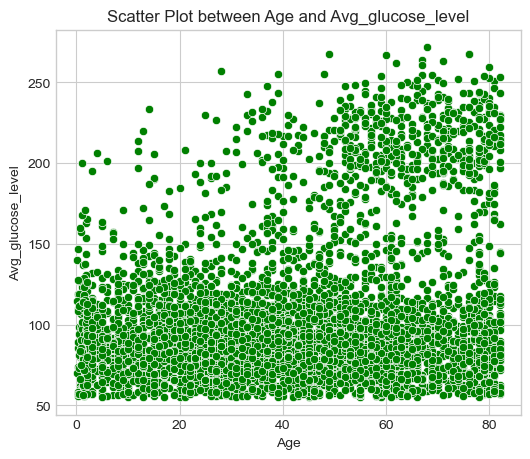

In [92]:
correlation=df['age'].corr(df['avg_glucose_level'])
print(f"Pearson Correlation between'Age'and 'Avg_glucose_level': {correlation}")

plt.figure(figsize=(6, 5))
sns.scatterplot(x='age', y='avg_glucose_level', data=df, color='green')
plt.title('Scatter Plot between Age and Avg_glucose_level')
plt.xlabel('Age')
plt.ylabel('Avg_glucose_level')
plt.show()

In [94]:
# Correlation analysis: age and avg_glucose_level
print(f"\nCorrelation analysis: \nage and avg_glucose_level\n")
correlation, p_value = pearsonr(df['age'], df['avg_glucose_level'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value                        : {p_value:.4f}")

if p_value < 0.05:
    print(f"\nReject the null hypothesis. There is a significant linear relationship between the variables.")
else:
    print(f"\nFail to reject the null hypothesis. There is no significant linear relationship between the variables.")


Correlation analysis: 
age and avg_glucose_level

Pearson correlation coefficient: 0.2368
P-value                        : 0.0000

Reject the null hypothesis. There is a significant linear relationship between the variables.


Pearson Correlation between'age'and 'bmi': 0.37370309888925163


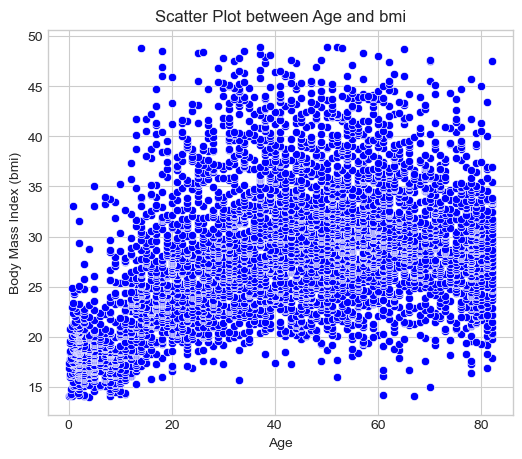

In [95]:
correlation=df['age'].corr(df['bmi'])
print(f"Pearson Correlation between'age'and 'bmi': {correlation}")

plt.figure(figsize=(6, 5))
sns.scatterplot(x='age', y='bmi', data=df, color='blue')
plt.title('Scatter Plot between Age and bmi')
plt.xlabel('Age')
plt.ylabel('Body Mass Index (bmi)')
plt.show()

In [96]:
# Correlation analysis: age and avg_glucose_level
print(f"\nCorrelation analysis: \nage and bmi\n")
correlation, p_value = pearsonr(df['age'], df['bmi'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value                        : {p_value:.4f}")

if p_value < 0.05:
    print(f"\nReject the null hypothesis. There is a significant linear relationship between the variables.")
else:
    print(f"\nFail to reject the null hypothesis. There is no significant linear relationship between the variables.")


Correlation analysis: 
age and bmi

Pearson correlation coefficient: 0.3737
P-value                        : 0.0000

Reject the null hypothesis. There is a significant linear relationship between the variables.


### T-TEST OR MANN-WHITNEY U TEST TO COMPARE MEANS BETWEEN TWO GROUPS

Assumptions for T-test
- Data in each group should be normally distributed.
- Variances of the two groups should be equal.
- Observations must be independent

#### NUMERICAL VS CATEGORICAL(BINARY)

##### Avg_glucose_level vs Stroke

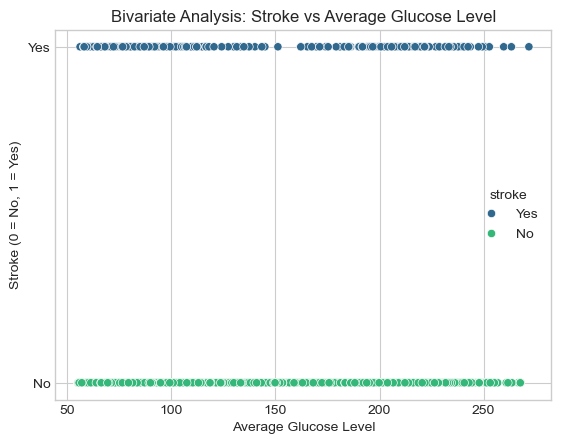

In [38]:
sns.scatterplot(data=df, x='avg_glucose_level', y='stroke', hue='stroke', palette='viridis')

# Adding titles and labels
plt.title('Bivariate Analysis: Stroke vs Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Stroke (0 = No, 1 = Yes)')

# Show the plot
plt.show()

In [39]:
# Normality Check - Shapiro-Wilk test
print(f"Normality Check (Shapiro-Wilk test):\n")
gl_stroke_n = df[df['stroke'] == 'No']['avg_glucose_level']
gl_stroke_y = df[df['stroke'] == 'Yes']['avg_glucose_level']

shapiro_stroke_n_stat, shapiro_stroke_n_p = shapiro(gl_stroke_n)
shapiro_stroke_y_stat, shapiro_stroke_y_p = shapiro(gl_stroke_y)

if shapiro_stroke_n_p < 0.05:
    print(f"for avg_glucose_level (stroke='No')  : \nstatistic={shapiro_stroke_n_stat:.4f}, \np-value={shapiro_stroke_n_p:}: \nNot normally distributed\n")
if shapiro_stroke_n_p >= 0.05:
    print(f"for avg_glucose_level (stroke='No')  : \nstatistic={shapiro_stroke_n_stat:.4f}, \np-value={shapiro_stroke_n_p:}: \nNormally distributed\n")
if shapiro_stroke_y_p < 0.05:
    print(f"for avg_glucose_level (stroke='yes') : \nstatistic={shapiro_stroke_y_stat:.4f}, \np-value={shapiro_stroke_y_p:}: \nNot normally distributed\n")
if shapiro_stroke_y_p >= 0.05:
    print(f"for avg_glucose_level (stroke='yes') : \nstatistic={shapiro_stroke_y_stat:.4f}, \np-value={shapiro_stroke_y_p:}: \nNormally distributed\n")


Normality Check (Shapiro-Wilk test):

for avg_glucose_level (stroke='No')  : 
statistic=0.8028, 
p-value=3.3483867691872187e-60: 
Not normally distributed

for avg_glucose_level (stroke='yes') : 
statistic=0.8711, 
p-value=1.3055290112065986e-13: 
Not normally distributed



In [40]:
# Group Variance Check
print(f"Group Variance Check (Levene's test):\n")
levene_stat, levene_p = levene(gl_stroke_n, gl_stroke_y)

if levene_p < 0.05:
    print(f"Levene's test for variance equality: \nstatistic={levene_stat:.4f} \np-value  ={levene_p:.4f} \ngroup variance is not eaual")
else:
    print(f"Levene's test for variance equality: \nstatistic={levene_stat:.4f} \np-value  ={levene_p:.4f} \ngroup variance is eaual")

Group Variance Check (Levene's test):

Levene's test for variance equality: 
statistic=94.1890 
p-value  =0.0000 
group variance is not eaual


In [41]:
print(f"Independency: \nI assume stroke='No' and stroke='Yes'  are as independent groups.")

Independency: 
I assume stroke='No' and stroke='Yes'  are as independent groups.


In [42]:
# t-test or Mann-Whitney U test
alpha = 0.05 
if shapiro_stroke_n_p > alpha and shapiro_stroke_y_p > alpha and levene_p > alpha:
    print(f"Performing independent t-test (normality and equal variance assumed)")
    ttest_stat, ttest_p = ttest_ind(glucose_stroke_0, glucose_stroke_1)
    print(f"Independent t-test: \nstatistic={ttest_stat:.4f} \np-value  ={ttest_p:.4f}")
else:
    print(f"Performing Mann-Whitney U test (normality or equal variance not assumed)")
    mannwhitney_stat, mannwhitney_p = mannwhitneyu(gl_stroke_n, gl_stroke_y, alternative='two-sided') #two-sided for difference, can be 'less' or 'greater' for one-sided
    print(f"Mann-Whitney U test: \nstatistic={mannwhitney_stat:.4f} \np-value  ={mannwhitney_p:.4f}")

Performing Mann-Whitney U test (normality or equal variance not assumed)
Mann-Whitney U test: 
statistic=457752.0000 
p-value  =0.0000


In [43]:
# stats.normaltest(g1)


#### ANALYSIS OF VARIANCE (ANOVA) TO COMPARE MEANS ACROSS MULTIPLE GROUPS.

Assumptions for ANOVA
- Residuals (errors) should be normally distributed.
- Variances across all groups should be equal.
- Observations must be independent.

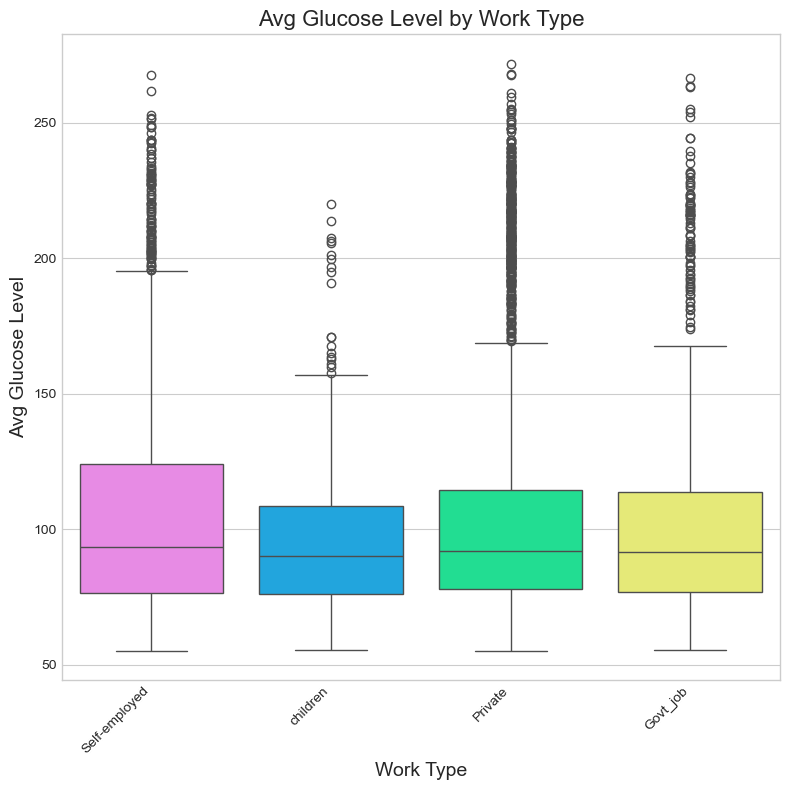

In [44]:
# group box plot 
plt.figure(figsize=(8, 8))  
colors = ['#F67CF2', '#03B1FC', '#03fc98', '#f7fc65']
sns.boxplot(x='work_type', y='avg_glucose_level', data=df, palette=colors)
plt.title('Avg Glucose Level by Work Type', fontsize = 16)
plt.xlabel('Work Type', fontsize = 14)
plt.ylabel('Avg Glucose Level', fontsize = 14)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

In [45]:
# df['work_type'].unique()

In [46]:
# Normality Check - Shapiro-Wilk test
print(f"Normality Check (Shapiro-Wilk test):\n")
gl_wt_Private = df[df['work_type'] == 'Private']['avg_glucose_level']
gl_wt_Self_emp = df[df['work_type'] == 'Self-employed']['avg_glucose_level']
gl_wt_Govt_job = df[df['work_type'] == 'Govt_job']['avg_glucose_level']
gl_wt_children = df[df['work_type'] == 'children']['avg_glucose_level']

shapiro_Private_stat,  shapiro_Private_p  = shapiro(gl_wt_Private)
shapiro_Self_emp_stat, shapiro_Self_emp_p = shapiro(gl_wt_Self_emp)
shapiro_Govt_job_stat, shapiro_Govt_job_p = shapiro(gl_wt_Govt_job)
shapiro_children_stat, shapiro_children_p = shapiro(gl_wt_children)

if shapiro_Private_p < 0.05:
    print(f"Shapiro-Wilk test for avg_glucose_level (Private) : \nstatistic={shapiro_Private_stat:.4f}, \np-value={shapiro_Private_p:}\nNot normally distributed\n")
else:
    print(f"Shapiro-Wilk test for avg_glucose_level (Private) : \nstatistic={shapiro_Private_stat:.4f}, \np-value={shapiro_Private_p:}\nNormally distributed\n")

if shapiro_Self_emp_p < 0.05:
    print(f"Shapiro-Wilk test for avg_glucose_level (Self-employed): \nstatistic={shapiro_Self_emp_stat:.4f}, \np-value={shapiro_Self_emp_p:}: \nNot normally distributed\n")
else:
    print(f"Shapiro-Wilk test for avg_glucose_level (Self-employed): \nstatistic={shapiro_Self_emp_stat:.4f}, \np-value={shapiro_Self_emp_p:}: \nNormally distributed\n")

if shapiro_Govt_job_p < 0.05:
    print(f"Shapiro-Wilk test for avg_glucose_level (Govt_job): \nstatistic={shapiro_Govt_job_stat:.4f}, \np-value={shapiro_Govt_job_p:}: \nNot normally distributed\n")
else:
    print(f"Shapiro-Wilk test for avg_glucose_level (Govt_job): \nstatistic={shapiro_Govt_job_stat:.4f}, \np-value={shapiro_Govt_job_p:}: \nNormally distributed\n")

if shapiro_children_p < 0.05:
    print(f"Shapiro-Wilk test for avg_glucose_level (children): \nstatistic={shapiro_children_stat:.4f}, \np-value={shapiro_children_p:}: \nNot normally distributed\n")
else:
    print(f"Shapiro-Wilk test for avg_glucose_level (children): \nstatistic={shapiro_children_stat:.4f}, \np-value={shapiro_children_p:}: \nNormally distributed\n")


Normality Check (Shapiro-Wilk test):

Shapiro-Wilk test for avg_glucose_level (Private) : 
statistic=0.8045, 
p-value=2.6976622419725815e-50
Not normally distributed

Shapiro-Wilk test for avg_glucose_level (Self-employed): 
statistic=0.8160, 
p-value=2.5791817444376395e-29: 
Not normally distributed

Shapiro-Wilk test for avg_glucose_level (Govt_job): 
statistic=0.8013, 
p-value=2.3480229140297003e-27: 
Not normally distributed

Shapiro-Wilk test for avg_glucose_level (children): 
statistic=0.9111, 
p-value=2.1210013561503413e-19: 
Not normally distributed



In [47]:
# Group Variance Check
print(f"Group Variances Check:\n")
levene_stat, levene_p1 = levene(gl_wt_Private, gl_wt_Self_emp, gl_wt_Govt_job, gl_wt_children)

if levene_p1 < 0.05:
    print(f"Levene's test for variance equality: \nstatistic = {levene_stat:.4f}, \np-value   = {levene_p1:.4f} \ngroup variance is not eaual")
else:
    print(f"Levene's test for variance equality: \nstatistic = {levene_stat:.4f}, \np-value   = {levene_p1:.4f} \ngroup variance is eaual")



Group Variances Check:

Levene's test for variance equality: 
statistic = 26.0712, 
p-value   = 0.0000 
group variance is not eaual


In [48]:
# independence between groups 
print(f"Independency Check: \nI assume work_type groups are independent.")

Independency Check: 
I assume work_type groups are independent.


In [49]:
# I can do ANOVA if normal and equal variance assumptions are reasonably met
alpha = 0.05
normality_assumption = (shapiro_Private_p > alpha and shapiro_Self_emp_p > alpha and
                        shapiro_Govt_job_p > alpha and shapiro_children_p > alpha)
                       
equal_variance_assumption = levene_p1 > alpha

if normality_assumption and equal_variance_assumption:
    print(f"\Performing ANOVA (normality and equal variance assumed)")  
    f_statistic, p_value = f_oneway(gl_wt_Private, gl_wt_Self_emp, gl_wt_Govt_job, gl_wt_children)
    print(f"ANOVA: statistic={f_statistic:.4f}, p-value={p_value:.4f}")
else:
    print(f"Assumptions for ANOVA not fully met, \nconsider Kruskal-Wallis test if needed (not explicitly requested, proceeding with ANOVA interpretation based on results)\n")
    f_statistic, p_value = f_oneway(gl_wt_Private, gl_wt_Self_emp, gl_wt_Govt_job, gl_wt_children)
    print(f"ANOVA (even with assumption concerns, for project demonstration): \nstatistic={f_statistic:.4f} \np-value={p_value:.4f}")

    # Kruskal-Wallis Test
    print(f"\nPerforming Kruskal-Wallis test")
    kruskal_stat, kruskal_p_value = kruskal(gl_wt_Private, gl_wt_Self_emp, gl_wt_Govt_job, gl_wt_children)
    print(f"Kruskal-Wallis statistic: {kruskal_stat:.4f}, p-value={kruskal_p_value:.4f}")

print(f'Since p-value < 0.05, we reject the null hypothesis, means that the medians of all groups are not equal.')
print(f'Null hypothesis (𝐻0: The medians of all groups are equal')

Assumptions for ANOVA not fully met, 
consider Kruskal-Wallis test if needed (not explicitly requested, proceeding with ANOVA interpretation based on results)

ANOVA (even with assumption concerns, for project demonstration): 
statistic=20.3382 
p-value=0.0000

Performing Kruskal-Wallis test
Kruskal-Wallis statistic: 16.0352, p-value=0.0011
Since p-value < 0.05, we reject the null hypothesis, means that the medians of all groups are not equal.
Null hypothesis (𝐻0: The medians of all groups are equal


For ANOVA/Welch's ANOVA:<br>
- Since p-value < alpha (0.05), we reject the null hypothesis <br>(at least one group mean is different)


For Kruskal-Wallis:<br>
- Since p-value < alpha (0.05), we reject the null hypothesis <br>
For Kruskal-Wallis: Interpretation is about medians.

#### 9.	CHECK FOR PRESENCE OF COLLINEARITY AND MULTI-COLLINEARITY AND ADDRESS IT APPROPRIATELY.

<Axes: >

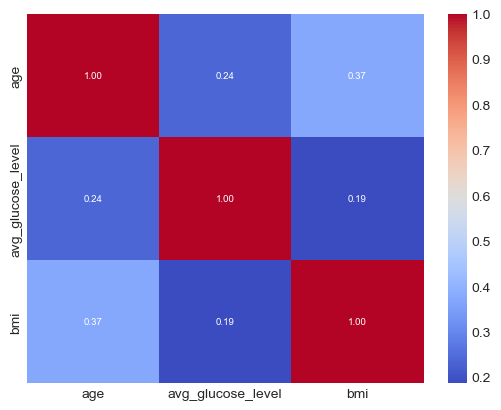

In [50]:
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 7},  fmt = ".2f", cmap='coolwarm') #annot_kws={"size": 7}

Perusal of above heatmap explains us that there is no significant correlation in above variables

In [51]:
# Check the VIF valus of the feature variables. 
print(f"Check for Collinearity and Multi-collinearity using VIF")

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = num_features.columns
vif['VIF'] = [variance_inflation_factor(num_features.values, i) for i in range(num_features.shape[1])]
print(vif)

Check for Collinearity and Multi-collinearity using VIF
            Features       VIF
0                age  5.616867
1  avg_glucose_level  6.197388
2                bmi  8.773888


In [52]:
vif_above_10=(vif.VIF>10).sum()
if vif_above_10 >0:
    print(f"xxx")
    print(f"consider dropping them")
else:
    print(f"There are {vif_above_10} variables with VIF score greater than 10")
    print(f"No action is required")

There are 0 variables with VIF score greater than 10
No action is required


#### 10. ENCODE THE DATA IF REQUIRED (IF THERE ARE CATEGORICAL INDEPENDENT VARIABLES).

In [53]:
print(f"Dummy variable encoding for categorical features is done\n")
df_dummy = pd.get_dummies(df,columns=['gender', 'hypertension', 'heart_disease', 'ever_married', \
                                      'work_type','Residence_type', 'smoking_status'], drop_first=True)
df_dummy.info()


Dummy variable encoding for categorical features is done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4981 non-null   float64
 1   avg_glucose_level               4981 non-null   float64
 2   bmi                             4981 non-null   float64
 3   stroke                          4981 non-null   object 
 4   gender_Male                     4981 non-null   bool   
 5   hypertension_Yes                4981 non-null   bool   
 6   heart_disease_Yes               4981 non-null   bool   
 7   ever_married_Yes                4981 non-null   bool   
 8   work_type_Private               4981 non-null   bool   
 9   work_type_Self-employed         4981 non-null   bool   
 10  work_type_children              4981 non-null   bool   
 11  Residence_type_Urban            4981 

#### 11. SPLIT THE DATASET INTO TRAINING AND TESTING SUBSETS

In [54]:
print(f"Splitting dataset into training and testing sets\n")
# defin features (X) and target(y)
X = df_dummy.drop('stroke', axis=1)
y = df_dummy['stroke']

# split train test data(train 80%, test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Splitting dataset into training and testing sets

X_train shape: (3984, 14)
X_test shape: (997, 14)
y_train shape: (3984,)
y_test shape: (997,)


In [55]:
X_train.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_Yes,heart_disease_Yes,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4468,19.0,77.19,37.4,False,False,False,False,True,False,False,False,False,False,True
1175,27.0,78.05,22.3,False,False,False,False,True,False,False,False,False,True,False
2457,37.0,98.12,27.5,False,False,False,True,True,False,False,False,False,True,False
1213,62.0,72.50,22.5,True,False,False,True,True,False,False,True,True,False,False
3736,35.0,145.23,32.3,True,False,False,True,True,False,False,True,False,True,False


#### 12. SCALE THE TRAINING DATA AND USE THE SAME SCALER TO ALSO SCALE THE TEST DATA.

In [56]:
df_dummy.head(3)

,age,avg_glucose_level,bmi,stroke,gender_Male,hypertension_Yes,heart_disease_Yes,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,81.00,81.95,16.9,Yes,False,False,False,True,False,True,False,False,False,True,False
1,1.32,70.37,18.7,Yes,False,False,False,False,False,False,True,True,False,False,False
2,81.00,78.70,19.4,Yes,False,False,True,True,False,True,False,False,False,False,False


In [57]:
# Scaling the data
num_features_for_sc = ['age', 'avg_glucose_level', 'bmi'] 
sc = StandardScaler()

# Fit and tranform on training data
X_train_sc = X_train.copy()

X_train_sc = sc.fit_transform(X_train) 
X_test_sc  = sc.transform(X_test)

In [58]:
print(f"Scaled X_train head:")
X_train_sc

Scaled X_train head:


array([[-1.05986159, -0.64170187,  1.30105574, ..., -0.45848289,
        -0.753992  ,  2.32489671],
       [-0.70879032, -0.62259255, -0.90284163, ..., -0.45848289,
         1.32627402, -0.43012664],
       [-0.26995124, -0.17663449, -0.1438836 , ..., -0.45848289,
         1.32627402, -0.43012664],
       ...,
       [-0.26995124, -0.69969641,  0.45452563, ..., -0.45848289,
        -0.753992  , -0.43012664],
       [-0.44548688, -0.48149471,  0.17721403, ..., -0.45848289,
        -0.753992  ,  2.32489671],
       [ 1.09044991,  0.22577211, -0.34821845, ..., -0.45848289,
         1.32627402, -0.43012664]])

In [59]:
print(f"\nScaled X_test head:")
X_test_sc


Scaled X_test head:


array([[-0.48937078, -0.61703752,  0.36695354, ..., -0.45848289,
        -0.753992  , -0.43012664],
       [-1.1037455 , -0.78946575, -0.72769747, ..., -0.45848289,
        -0.753992  , -0.43012664],
       [ 1.26598554,  0.13444736,  0.29397681, ..., -0.45848289,
         1.32627402, -0.43012664],
       ...,
       [ 1.57317289,  2.20558592,  0.36695354, ..., -0.45848289,
        -0.753992  ,  2.32489671],
       [-0.84044205, -0.0268708 , -1.26772531, ..., -0.45848289,
         1.32627402, -0.43012664],
       [ 1.66094071,  0.38709027,  0.3231675 , ..., -0.45848289,
        -0.753992  ,  2.32489671]])

#### 13.	SELECT ONE CATEGORICAL VARIABLE AS THE TARGET. CONDUCT LOGISTIC REGRESSION AND DECISION TREE ANALYSIS TO PREDICT IT AND COMPARE THE PERFORMANCE OF THE TWO MODELS.
-	CHECK FOR OVERFITTING AND TAKE STEPS TO ADDRESS IT.


#### Logistic Regression

In [60]:
#create an instanse
model_LR= LogisticRegression(max_iter=1000, random_state=42) # class_weight='balanced'   REFER NOTEBOOK 9.1

#train model
model_LR.fit(X_train_sc, y_train)

# Predict on test set
y_pred= model_LR.predict(X_test_sc)
y_pred_probs = model_LR.predict_proba(X_test_sc)

Classification Report
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       947
         Yes       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997

Train_accuracy_score = 0.950301
Test_accuracy_score  = 0.949850

Confusion Matrix
[[947   0]
 [ 50   0]]


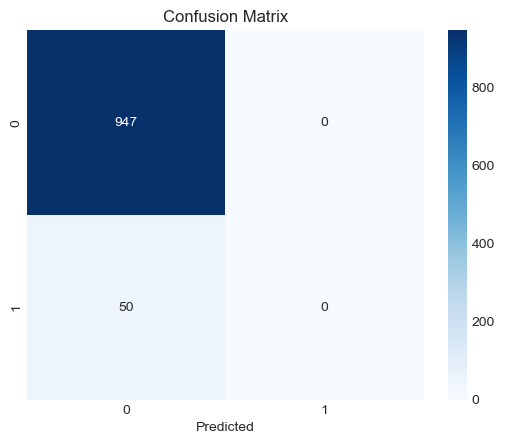

In [61]:
# print classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

# print train accuracy score
LR_train_accuracy_score = accuracy_score(y_train, model_LR.predict(X_train_sc))
print(f'Train_accuracy_score = {LR_train_accuracy_score:.6f}')

# print test accuracy score
LR_test_accuracy_score =accuracy_score(y_test,y_pred)
print(f'Test_accuracy_score  = {LR_test_accuracy_score:.6f}')

# print confusion metrix
print("\nConfusion Matrix")
cm = confusion_matrix(y_test, y_pred)
print(f'{cm}')

# print confusion metrix heatmap
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.show()

In [62]:
#k-fold cross-validation
print("k-fold cross-validation:\n")
kf = KFold(n_splits=5, random_state=42, shuffle=True) 
# scores = cross_val_score(model_LR, X_train_sc, y_train, cv=kf, n_jobs=-1)
auc  = cross_val_score(model_LR, X_train_sc, y_train, cv=kf, n_jobs=-1, scoring='roc_auc')

print(f'Cross Validation Accuracy Scores: \n{auc}\n')
print(f'Mean Cross Validation Accuracy (Logistic Regression): \n{np.mean(auc):.6f}')
print(f'\nThe cross-validation results suggest that the logistic regression model is performing well and generalizes effectively to unseen data')

k-fold cross-validation:

Cross Validation Accuracy Scores: 
[0.79847423 0.81479048 0.81176362 0.86339491 0.85272499]

Mean Cross Validation Accuracy (Logistic Regression): 
0.828230

The cross-validation results suggest that the logistic regression model is performing well and generalizes effectively to unseen data


In [63]:
#k-fold cross-validation
print("k-fold cross-validation:\n")
kf = KFold(n_splits=5, random_state=42, shuffle=True) 
scores = cross_val_score(model_LR, X_train_sc, y_train, cv=kf, n_jobs=-1)
print(f'Cross Validation Accuracy Scores: \n{scores}\n')
print(f'Mean Cross Validation Accuracy (Logistic Regression): \n{np.mean(scores):.6f}')
print(f'\nThe model is likely to perform well on unseen data and provide reliable predictions.')
# nb 7.3
# cross validation 
# auc=cross_val_score(model,X_train,y_train,cv=folds, n_jobs=-1,scoring='roc_auc').mean()
# Accuracy=cross_val_score(model,X_train,y_train,cv=folds, n_jobs=-1).mean()
# scores = cross_val_score(model,X_train,y_train,cv=folds, n_jobs=-1,scoring='f1')
# f1score=scores.mean()


k-fold cross-validation:

Cross Validation Accuracy Scores: 
[0.95357591 0.95483061 0.94730238 0.94479297 0.95100503]

Mean Cross Validation Accuracy (Logistic Regression): 
0.950301

The model is likely to perform well on unseen data and provide reliable predictions.


Since test accuracy score and training accuracy score are almost same we do not observe an overfitting of the model.
- Train_accuracy_score = 0.950301
- Test_accuracy_score  = 0.949850

### DECISION TREE CLASSIFIER

DECISION TREE
Classification Report
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       947
         Yes       0.50      0.02      0.04        50

    accuracy                           0.95       997
   macro avg       0.73      0.51      0.51       997
weighted avg       0.93      0.95      0.93       997

Confusion Matrix
[[946   1]
 [ 49   1]]
Training Accuracy: 0.9511
Test Accuracy    : 0.9498

k-fold cross-validation:
Cross Validation Accuracy Scores: 
[0.9523212  0.95483061 0.94228356 0.94353827 0.95100503]

Mean Cross Validation Accuracy: 0.9488
Accuracy score                : 0.9498

DT Train/Test Accuracy:, 0.9511 / 0.9498

OBSERVATION:
Since test accuracy score and training accuracy score are almost same we do not observe an overfitting of the model
- Train_accuracy_score : 0.9511
- Test_accuracy_score  : 0.9498


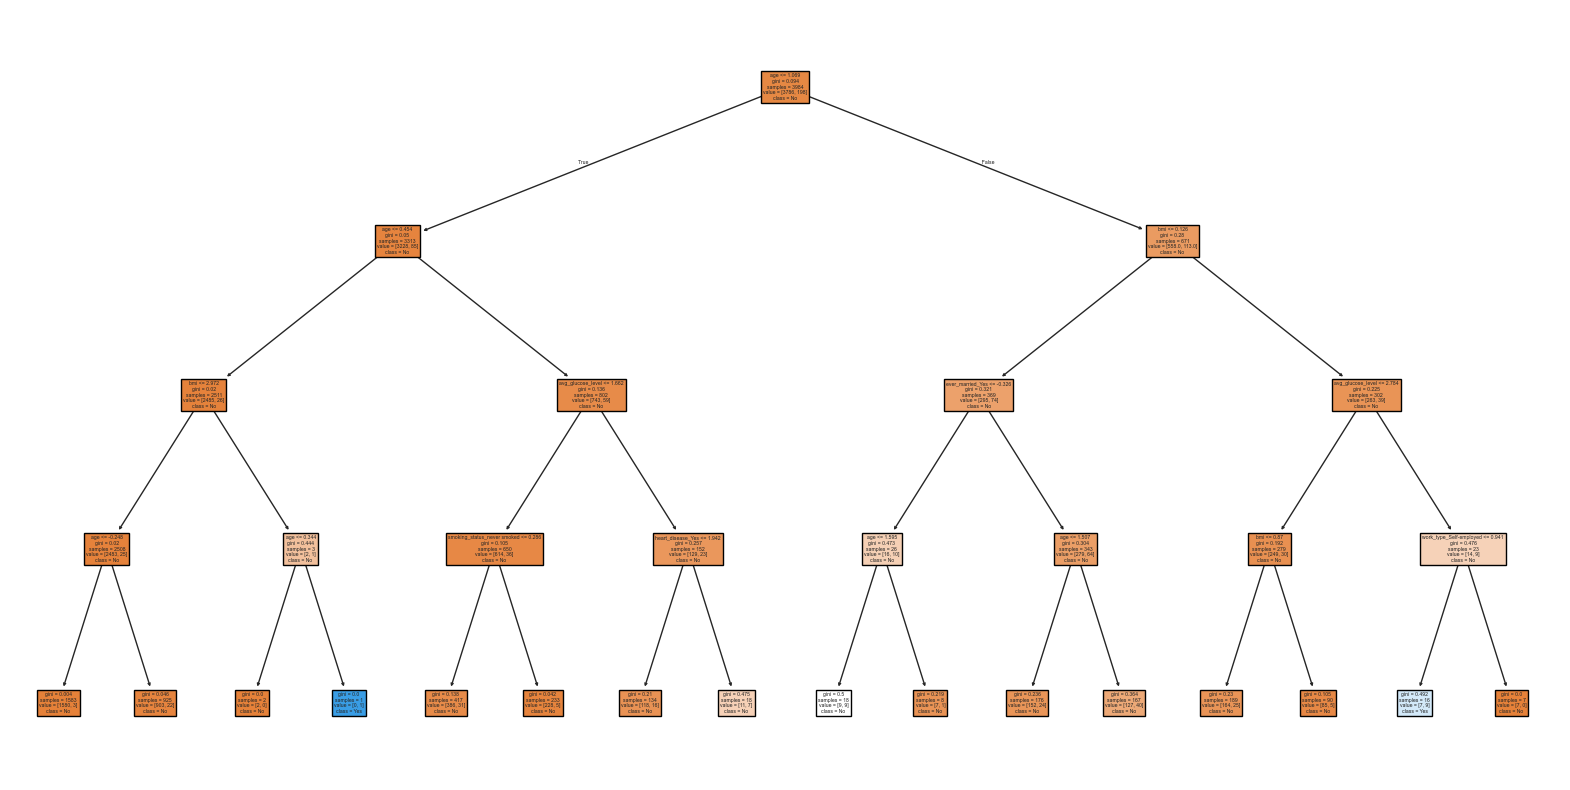

In [64]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_sc, y_train)

#predict on test set
y_pred_dt = clf.predict(X_test_sc,)

# print classification report
print("DECISION TREE")
print("Classification Report")
print(classification_report(y_test, y_pred_dt))

# print confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt))

# Training accuracy
train_accuracy = clf.score(X_train_sc, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")
# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy    : {test_accuracy:.4f}")
   
#k-fold cross-validation
print(f"\nk-fold cross-validation:")
kf = KFold(n_splits=5, random_state=42, shuffle=True) 
scores = cross_val_score(clf, X_train_sc, y_train, cv=kf, n_jobs=-1)
print(f'Cross Validation Accuracy Scores: \n{scores:}')
print(f'\nMean Cross Validation Accuracy: {np.mean(scores):.4}')

# Print the accuracy score
print(f'Accuracy score                : {np.mean(y_pred_dt == y_test):.4f}\n')

# Overfitting Check
print(f"DT Train/Test Accuracy:, {clf.score(X_train_sc, y_train):.4f} / {clf.score(X_test_sc, y_test):.4f}")

# observation:
print(f'\nOBSERVATION:')
print(f"Since test accuracy score and training accuracy score are almost same we do not observe an overfitting of the model")
print(f"- Train_accuracy_score : {train_accuracy:.4f}")
print(f"- Test_accuracy_score  : {test_accuracy:.4f}")

# Visualize the decision tree
# fig, ax = plt.subplots(figsize=(12, 8))
# plot_tree(clf, filled=True, ax=ax)
# plt.show() 


plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'])
plt.show()

### Overfitting Check: Compare Training & Test Accuracy

In [65]:
print(f"Logistic Regression,  \nTraining Accuracy: {LR_train_accuracy_score:.6f}\nTest Accuracy    : {LR_test_accuracy_score:.6f}")
print(f"\nDecision Tree,        \nTraining Accuracy: {train_accuracy:.6f}\nTest Accuracy    : {test_accuracy:.6f}")

Logistic Regression,  
Training Accuracy: 0.950301
Test Accuracy    : 0.949850

Decision Tree,        
Training Accuracy: 0.951054
Test Accuracy    : 0.949850


Training Accuracy Comparison:<br>
The Decision Tree model has a slightly higher training accuracy (0.951054) compared to the Logistic Regression model (0.950301).

Test Accuracy Comparison:<br>
The Logistic Regression model and Decision Tree model almost have similar accuracy(0.949850).


Based on above, both the models indicate a very ssimilar training and test accuracy, indicating good generalization.

In [66]:
# Slect the best depth for decisiontreeclassifier
train_scores = []
test_scores = []
cv_scores_means = [] 

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_sc, y_train, cv=5)
    cv_mean_accuracy = np.mean(cv_scores)
    cv_scores_means.append(cv_mean_accuracy)  

    # Trainentire training set and evaluate on train and test sets
    model.fit(X_train_sc, y_train)

    train_accuracy = model.score(X_train_sc, y_train)
    train_scores.append(train_accuracy)

    test_accuracy = model.score(X_test_sc, y_test)
    test_scores.append(test_accuracy)

    print(f'Model max depth = {depth}: Train Score = {train_accuracy:.4f}, CV Mean Accuracy = {cv_mean_accuracy:.4f}, Test Score = {test_accuracy:.4f}')

Model max depth = 1: Train Score = 0.9503, CV Mean Accuracy = 0.9503, Test Score = 0.9498
Model max depth = 2: Train Score = 0.9503, CV Mean Accuracy = 0.9503, Test Score = 0.9498
Model max depth = 3: Train Score = 0.9503, CV Mean Accuracy = 0.9493, Test Score = 0.9498
Model max depth = 4: Train Score = 0.9511, CV Mean Accuracy = 0.9490, Test Score = 0.9498
Model max depth = 5: Train Score = 0.9531, CV Mean Accuracy = 0.9423, Test Score = 0.9418
Model max depth = 6: Train Score = 0.9576, CV Mean Accuracy = 0.9428, Test Score = 0.9368
Model max depth = 7: Train Score = 0.9623, CV Mean Accuracy = 0.9337, Test Score = 0.9408
Model max depth = 8: Train Score = 0.9684, CV Mean Accuracy = 0.9350, Test Score = 0.9388
Model max depth = 9: Train Score = 0.9746, CV Mean Accuracy = 0.9272, Test Score = 0.9328
Model max depth = 10: Train Score = 0.9822, CV Mean Accuracy = 0.9270, Test Score = 0.9248
Model max depth = 11: Train Score = 0.9877, CV Mean Accuracy = 0.9237, Test Score = 0.9157
Model ma

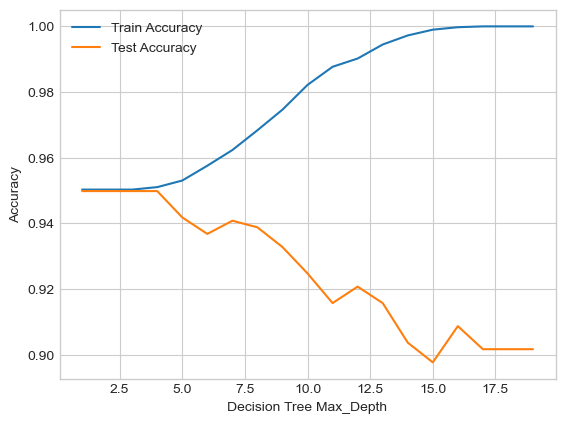

In [67]:
plt.plot(range(1,20), train_scores, label = "Train Accuracy")
plt.plot(range(1,20),test_scores, label = "Test Accuracy")

plt.xlabel("Decision Tree Max_Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 14.Select one continuous variable as the target. Conduct Linear Regression and Regression Tree to predict it and compare the performance of the two models.
-	Check for validity of assumptions (LINE)
-	Check for overfitting and take steps to address it.


In [68]:
df1 = df.copy()

In [69]:
# Drop 'stroke' (previous classification target) 
df1 = df1.drop('stroke', axis=1)

In [70]:
# Encode remaining categorical features
df_dum = pd.get_dummies(df1, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 
                                       'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
# df_dum

In [71]:
# covert all columns to numric
for col in df_dum.select_dtypes(include='bool').columns:
    df_dum[col] = df_dum[col].astype(int)

In [72]:
# Split into features (X) and target (y = avg_glucose_level)
X1 = df_dum.drop('avg_glucose_level', axis=1)
y1 = df_dum['avg_glucose_level']  # target

In [73]:
# Split train test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape

((3984, 13), (3984,), (997, 13), (997,))

In [74]:
# numerical columns (age, bmi) for scaling
numerical_cols = ['age', 'bmi']

scaler = StandardScaler()
X1_train[numerical_cols] = scaler.fit_transform(X1_train[numerical_cols])
X1_test[numerical_cols] = scaler.transform(X1_test[numerical_cols])

In [75]:
X1_train.head()

,age,bmi,gender_Male,hypertension_Yes,heart_disease_Yes,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1652,-0.817349,-0.588701,0,0,0,1,1,0,0,1,0,0,0
1609,-0.817349,-0.618270,1,0,0,1,1,0,0,0,0,0,1
166,1.477704,0.431437,0,0,0,1,0,0,0,0,0,1,0
2488,-0.155314,-0.130378,0,0,0,0,1,0,0,1,0,1,0
3337,1.521840,0.313160,1,0,0,1,0,1,0,1,0,0,0


In [76]:
X1_test.head()

,age,bmi,gender_Male,hypertension_Yes,heart_disease_Yes,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1129,1.257026,-0.943532,0,1,0,1,1,0,0,0,0,1,0
3671,0.065364,0.520144,0,0,0,1,0,0,0,1,1,0,0
1041,0.286042,-1.017455,0,0,0,1,1,0,0,0,0,0,0
2072,0.418449,-0.352147,0,0,0,1,0,1,0,1,1,0,0
1375,0.418449,-0.766116,1,0,0,1,0,0,0,0,0,1,0


In [77]:
# Linear Regression
lr = LinearRegression()

# Fit modl
lr.fit(X1_train, y1_train)

#predict on test set
y1_pred = lr.predict(X1_test)

In [78]:
# Calculate metrics
n = X1_test.shape[0]  # Number of samples
p = X1_test.shape[1]  # Number of fetures

# R squared
r2 = r2_score(y1_test, y1_pred)

# Ajuested R squard
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Root Mean Sqr Error
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))

print("Linear Regression Metrics:")
print(f"R2         : {r2:.4f}")
print(f"Adjusted R2: {adj_r2:.4f}")
print(f"RMSE       : {rmse:.4f}\n")

Linear Regression Metrics:
R2         : 0.0880
Adjusted R2: 0.0759
RMSE       : 41.9530



In [79]:
# Get p-values using statsmodels
X1_train_sm = sm.add_constant(X1_train.astype(float))

#fit lenear regression model
# model = sm.OLS(y, x).fit()
model_sm = sm.OLS(y1_train.astype(float), X1_train_sm.astype(float)).fit()

print("Feature p-values:")
print(model_sm.pvalues[1:])  # Skip printing intercept
print(model_sm.summary())

Feature p-values:
age                               1.934730e-16
bmi                               8.624902e-20
gender_Male                       9.019366e-04
hypertension_Yes                  1.523123e-06
heart_disease_Yes                 3.246531e-12
ever_married_Yes                  7.993471e-01
work_type_Private                 3.170570e-01
work_type_Self-employed           8.106399e-01
work_type_children                2.035239e-07
Residence_type_Urban              6.298505e-01
smoking_status_formerly smoked    4.195664e-01
smoking_status_never smoked       1.421068e-01
smoking_status_smokes             9.919978e-01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     34.34
Date:                Wed, 19 Feb 2025   

In [80]:
# LINE Assumptions Check
residuals = y1_test - y1_pred

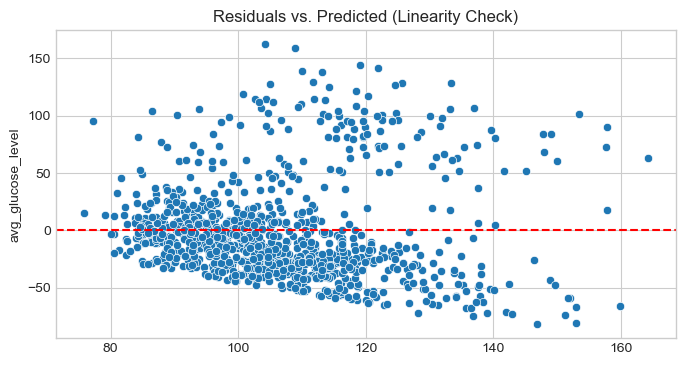

In [81]:
# Lenearity: Residuals vs. Predicted Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y1_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted (Linearity Check)')
plt.show()

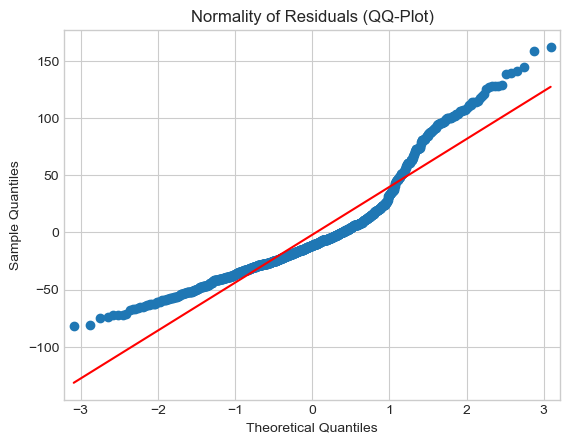

In [82]:
# normality: QQ-Plot
sm.qqplot(residuals, line='s')
plt.title('Normality of Residuals (QQ-Plot)')
plt.show()

In [83]:
# I manually set parameters to avoid overfitting
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10,random_state=42)
dt.fit(X1_train, y1_train)
y1_pred = dt.predict(X1_test)

In [84]:
# Calvulate metrics
r2_tree = r2_score(y1_test, y1_pred)
adj_r2_tree = 1 - (1 - r2_tree) * (n - 1) / (n - p - 1)
rmse_tree = np.sqrt(mean_squared_error(y1_test, y1_pred))

print("\nRegression Tree Metrics:")
print(f"R2         : {r2_tree:.4f}")
print(f"Adjusted R2: {adj_r2_tree:.4f}")
print(f"RMSE       : {rmse_tree:.4f}")



Regression Tree Metrics:
R2         : 0.0231
Adjusted R2: 0.0102
RMSE       : 43.4191


In [85]:
# Overfitting check
print(f"\nTree Train R2: {dt.score(X1_train, y1_train):.4f}")
print(f"Tree Test  R2: {dt.score(X1_test, y1_test):.4f}")


Tree Train R2: 0.1589
Tree Test  R2: 0.0231


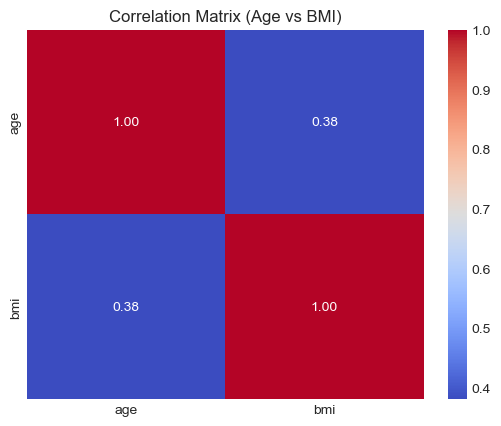

In [86]:
# Correlation matrix 
corr_matrix = X1_train[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Age vs BMI)')
plt.show()

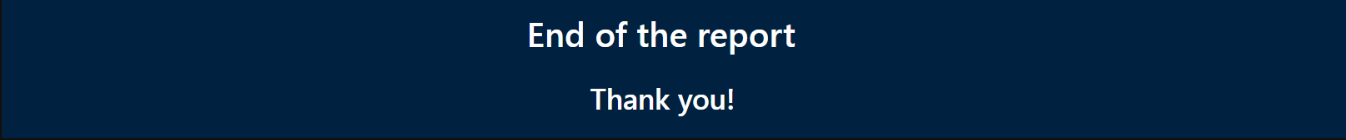